In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='white', context='notebook', palette='Set2')

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
games = pd.read_csv("../dataset/online-data/games.csv")
units = pd.read_csv("../dataset/online-data/units.csv")
orders = pd.read_csv("../dataset/online-data/orders.csv")
turns = pd.read_csv("../dataset/online-data/turns.csv")
players = pd.read_csv("../dataset/online-data/players.csv")

## データセットの確認
https://data.world/maxstrange/diplomacyboardgame

In [3]:
games.head()

,id,num_turns,num_players
0,37317,166,7
1,37604,51,7
2,39337,101,7
3,40541,46,7
4,44755,96,7


In [4]:
players.head()

,game_id,country,won,num_supply_centers,eliminated,start_turn,end_turn
0,114417,E,0,0,0,1,7
1,114417,F,0,9,0,1,21
2,114417,I,0,0,0,1,7
3,114417,G,0,4,0,1,17
4,114417,A,1,11,0,1,21


In [5]:
units.head()

,game_id,country,type,start_turn,end_turn,unit_id
0,114417,E,F,0,7,0
1,114417,E,A,0,10,1
2,114417,E,F,0,13,2
3,114417,F,A,0,21,3
4,114417,F,A,0,21,4


In [6]:
turns.head()

,game_id,turn_num,phase,year,season,scs_england,scs_france,scs_italy,scs_russia,scs_turkey,scs_germany,scs_austria
0,114417,0,Winter,1900,Winter,3,3,3,4,3,3,3
1,114417,1,Orders,1901,Spring,3,3,3,4,3,3,3
2,114417,2,Orders,1901,Fall,3,3,3,4,3,3,3
3,114417,3,Build,1901,Fall,4,6,4,6,4,4,5
4,114417,4,Orders,1902,Spring,4,6,4,6,4,4,5


In [8]:
orders.head()

,game_id,unit_id,unit_order,location,target,target_dest,success,reason,turn_num
0,114417,0,MOVE,Edinburgh,Norwegian Sea,NaN,1,NaN,1
1,114417,1,MOVE,Liverpool,Yorkshire,NaN,1,NaN,1
2,114417,2,MOVE,London,North Sea,NaN,1,NaN,1
3,114417,3,MOVE,Marseilles,Spain,NaN,1,NaN,1
4,114417,4,MOVE,Paris,Picardy,NaN,1,NaN,1


## データ分析
### gameの外観

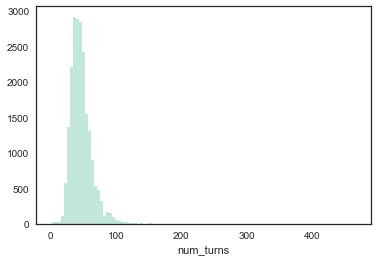

In [20]:
# turn数
x = games['num_turns']
sns.distplot(x, kde=False, rug=False, bins=100)

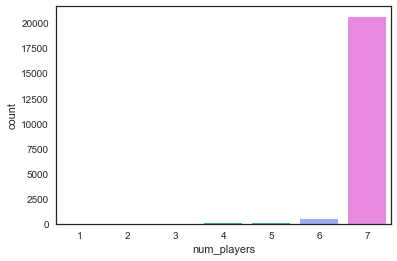

In [24]:
# プレイヤー数
sns.countplot(x="num_players", data = games)

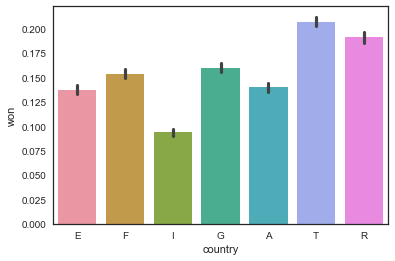

In [11]:
# 国ごとの勝率比較
sns.barplot(x="country", y="won", data = players)

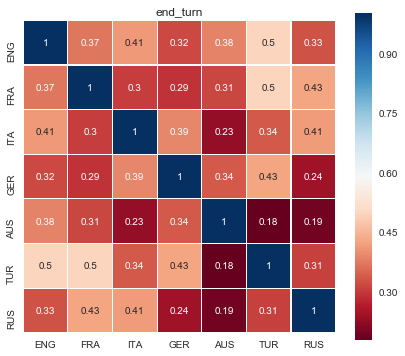

In [19]:
# 国と終了ターンの相関
correlation_matrix = np.corrcoef([players[(players["country"] == "E")]["end_turn"],
           players[(players["country"] == "F")]["end_turn"],
           players[(players["country"] == "I")]["end_turn"],
           players[(players["country"] == "G")]["end_turn"],
           players[(players["country"] == "A")]["end_turn"],
           players[(players["country"] == "T")]["end_turn"],
           players[(players["country"] == "R")]["end_turn"]])
correlation_matrix = pd.DataFrame(correlation_matrix)
correlation_matrix = correlation_matrix.rename(columns={0:"ENG", 1:"FRA", 2:"ITA", 3:"GER", 4:"AUS", 5:"TUR", 6:"RUS"},
                                              index={0:"ENG", 1:"FRA", 2:"ITA", 3:"GER", 4:"AUS", 5:"TUR", 6:"RUS"})

plt.figure(figsize=(7,6))
plt.title("end_turn")
sns.heatmap(correlation_matrix, annot=True, linewidths=0.1, square=True, cmap="RdBu")

### 補給地

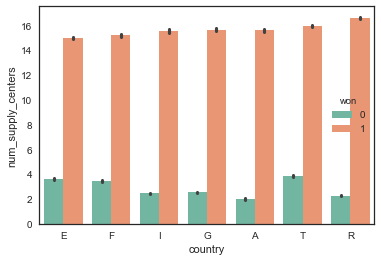

In [12]:
# 国ごとの補給地の数（平均, 勝ち負け別）
sns.barplot(x="country", y="num_supply_centers", hue="won", data = players)

#### 国と補給地数の相関を調べる

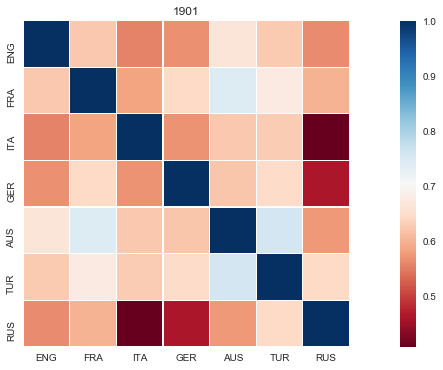

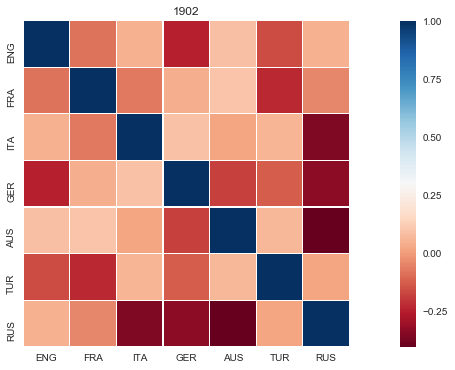

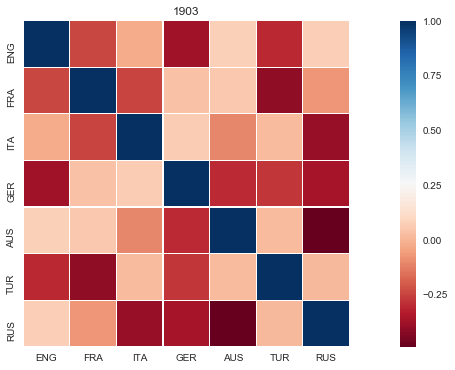

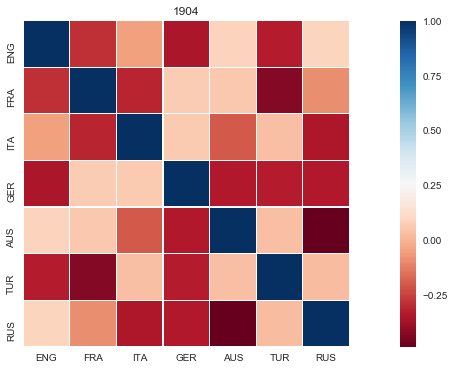

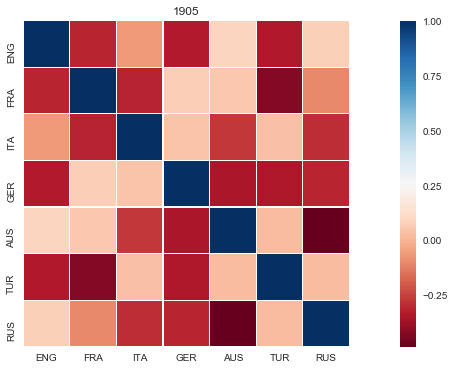

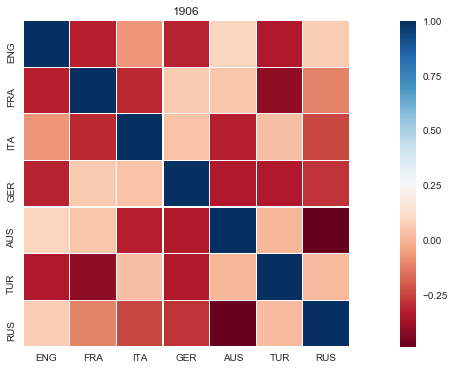

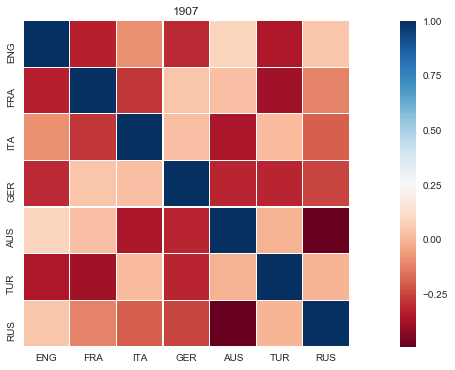

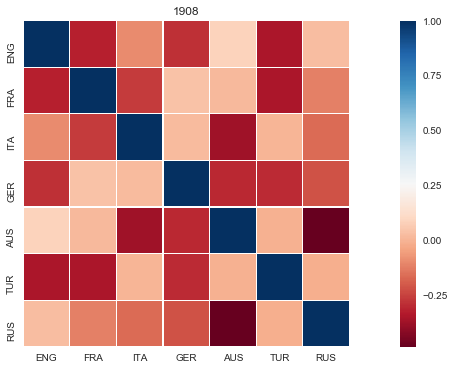

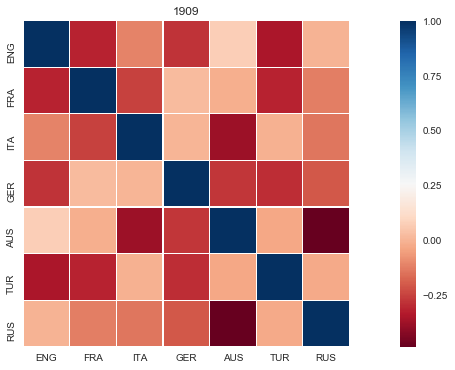

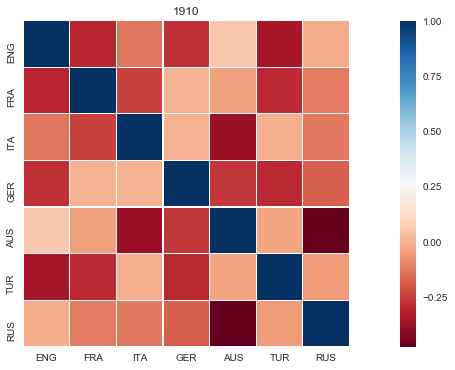

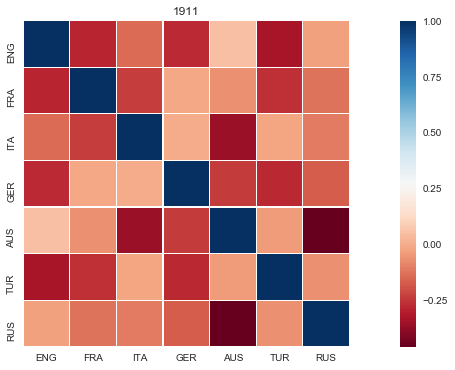

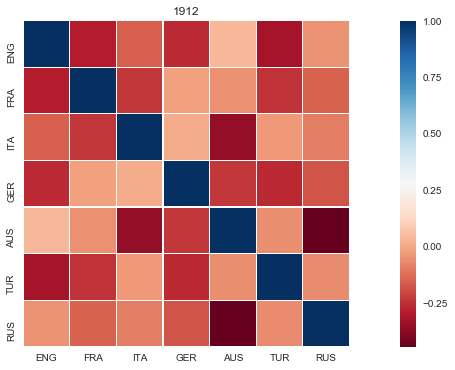

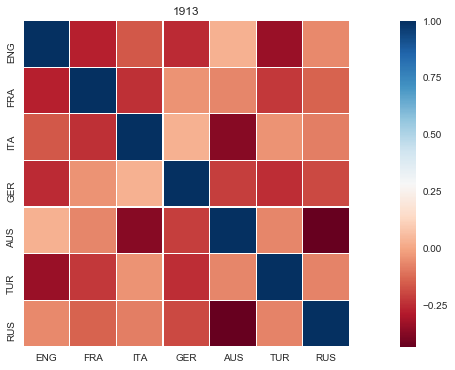

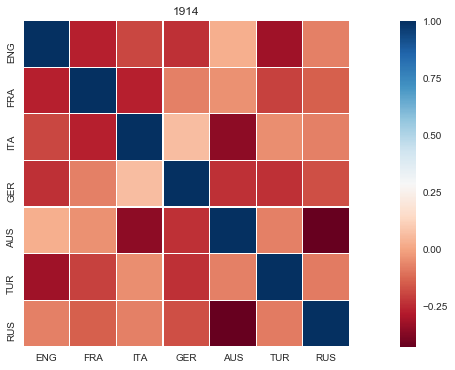

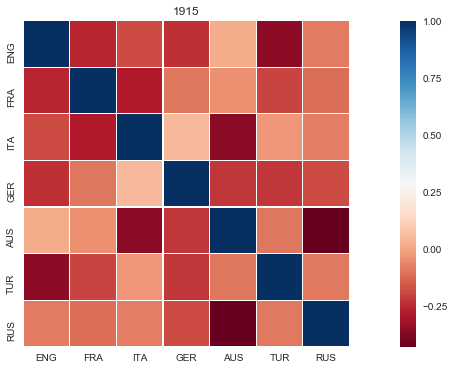

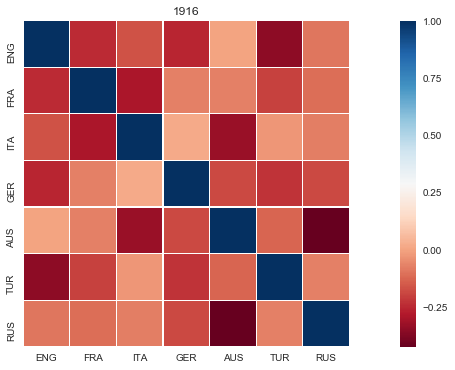

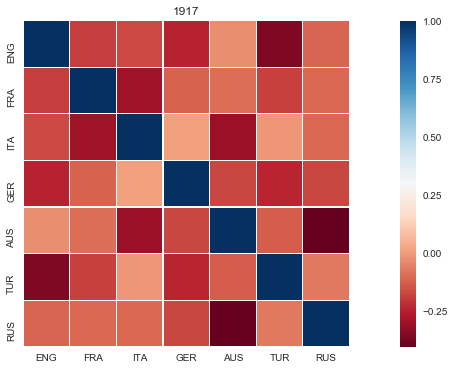

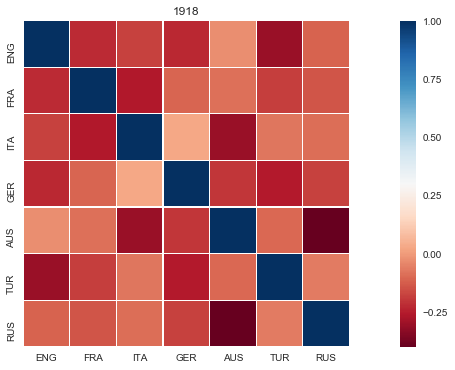

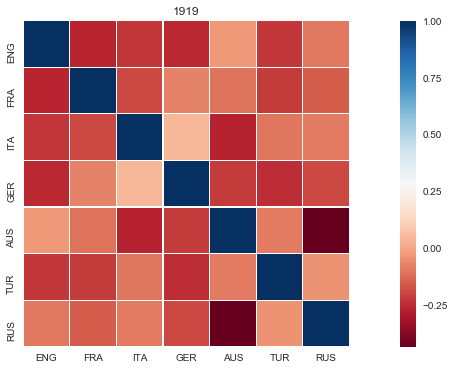

In [13]:
# # 補給地の数の相関，年毎
for i in range(1901, 1920):
    correlation_matrix = np.corrcoef([turns[(turns["year"] == i)]["scs_england"],
           turns[(turns["year"] == i)]["scs_france"],
           turns[(turns["year"] == i)]["scs_italy"],
           turns[(turns["year"] == i)]["scs_russia"],
           turns[(turns["year"] == i)]["scs_turkey"],
           turns[(turns["year"] == i)]["scs_germany"],
           turns[(turns["year"] == i)]["scs_austria"]])
    correlation_matrix = pd.DataFrame(correlation_matrix)
    correlation_matrix = correlation_matrix.rename(columns={0:"ENG", 1:"FRA", 2:"ITA", 3:"GER", 4:"AUS", 5:"TUR", 6:"RUS"},
                                              index={0:"ENG", 1:"FRA", 2:"ITA", 3:"GER", 4:"AUS", 5:"TUR", 6:"RUS"})
    plt.figure(figsize=(18, 6))
    plt.title(i)
    sns.heatmap(correlation_matrix, linewidths=0.1, square=True, cmap="RdBu")

### [wip] unit
ユニットの数からゲームの状態を求める

In [4]:
# merge dataset
df_dataset = pd.merge(orders, units, on=['game_id', 'unit_id'])
df_dataset = pd.merge(dataset, players, on=['game_id', 'country'])
df_dataset = pd.merge(dataset, turns, on=['game_id', 'turn_num'])

df_dataset['state'] = 0
df_dataset['eng_state'] = 0
df_dataset['fra_state'] = 0
df_dataset['ita_state'] = 0
df_dataset['rus_state'] = 0
df_dataset['tur_state'] = 0
df_dataset['ger_state'] = 0
df_dataset['aus_state'] = 0

# 補給地6以上ある場合を有利状態として，状態を128通りで定める
df_dataset.loc[df_dataset['scs_england'] > 6, ['eng_state']] = 1
df_dataset.loc[df_dataset['scs_france'] > 6, ['fra_state']] = 1
df_dataset.loc[df_dataset['scs_italy'] > 6, ['ita_state']] = 1
df_dataset.loc[df_dataset['scs_russia'] > 6, ['rus_state']] = 1
df_dataset.loc[df_dataset['scs_turkey'] > 6, ['tur_state']] = 1
df_dataset.loc[df_dataset['scs_germany'] > 6, ['ger_state']] = 1
df_dataset.loc[df_dataset['scs_austria'] > 6, ['aus_state']] = 1

df_dataset['state'] = 64*(df_dataset['eng_state'].values) + 32*(df_dataset['fra_state'].values)+ 16*(df_dataset['ita_state'].values)+ 8*(df_dataset['rus_state'].values) +4*(df_dataset['tur_state'].values) + 2 * (df_dataset['ger_state'].values)+ 1 * (df_dataset['aus_state'].values)
df_dataset.drop(columns=['eng_state', 'fra_state', 'ita_state', 'rus_state', 'tur_state', 'ger_state', 'aus_state'])

# eng_dataset = df_dataset[(df_dataset['country']=='E') & (df_dataset['won']==1)]
eng_dataset = df_dataset[(df_dataset['country']=='E')]
fra_dataset = df_dataset[(df_dataset['country']=='F')]
ita_dataset = df_dataset[(df_dataset['country']=='I')]
rus_dataset = df_dataset[(df_dataset['country']=='R')]
tur_dataset = df_dataset[(df_dataset['country']=='T')]
ger_dataset = df_dataset[(df_dataset['country']=='G')]
aus_dataset = df_dataset[(df_dataset['country']=='A')]

In [31]:
df_dataset['state'].value_counts()

0      3855068
8      1059835
40      512546
68      503052
6       475157
100     440995
2       413675
36      393591
44      369839
3       341942
12      333602
38      322356
10      285114
4       282952
70      280298
24      266688
65      260869
32      231771
1       225567
18      207793
56      198275
41      192082
64      190007
33      183662
97      175903
9       174886
84      167706
96      161632
67      156584
34      153242
        ...   
102      16717
71       15037
43       14329
54       14023
116      12869
58       12200
83       11052
89       10573
92        8739
51        8717
90        8009
30        7874
120       7771
27        7523
21        6988
78        6656
60        5797
13        5041
113       5024
57        3813
85        3566
45        2851
99        2094
75        1779
77         842
23         676
15         322
114        205
53         148
106        145
Name: state, Length: 98, dtype: int64

In [ ]:
df_dataset.to_csv("some")

#### MOVE

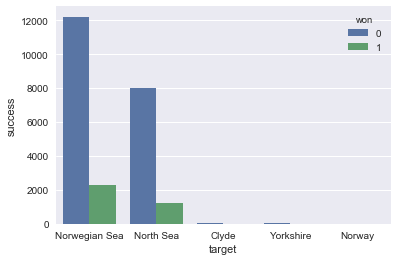

In [14]:
# Edinburghからの移動先
data = dataset[(dataset["year"]==1901)
               & (dataset["season"]=="Spring")
               & (dataset["success"]==1) 
               & (dataset["location"]=="Edinburgh") 
               & (dataset["unit_order"]=="MOVE")]
sns.barplot(x="target", y="success", data = data, hue="won", estimator=sum)